# Project 3: Medical School Acceptance Information

# Jena Georgopulos, jg64565

This project will analyze a dataset titled medschool that reports the acceptance status and other information for 55 students that applied to medical school after attending a liberal arts college in the midwest. The dataset includes the following variables: acceptance status of the applicant coded as a categorical variable with A= 'accepted' and D= 'denied' ('Accept'), acceptance status of the applicant coded as a binary numeric variable in which 1 = 'accepted' and 0 = 'denied' ('Acceptance'), gender of the applicant ('sex'), the applicant's overall GPA ('GPA'), the applicant's GPA for all bio/chem/physics/math classes taken ('BCPM'), the applicant's total score on the MCAT exam ('MCAT'), the applicant's score for the verbal reasoning section of the MCAT ('VR'), the applicant's score for the physical sciences section of the MCAT ('PS'), the applicant's score for the writing section of the MCAT ('WS'), the applicant's score for the biological sciences section of the MCAT ('BS'), and the number of medical schools that the applicant applied to ('Apps').  

In [1]:
# IMPORTANT
# Running this chunk lets you have multiple outputs from a single chunk; run it first!
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
# Import packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import dataset for medical school acceptance info as csv and title it "medschool"
medschool = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/MedGPA.csv")

In [4]:
# Take a look at the first 5 rows of the dataset medschool
medschool.head(5)

,Unnamed: 0,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
0,1,D,0,F,3.59,3.62,11,9,9.0,9,38,5
1,2,A,1,M,3.75,3.84,12,13,8.0,12,45,3
2,3,A,1,F,3.24,3.23,9,10,5.0,9,33,19
3,4,A,1,F,3.74,3.69,12,11,7.0,10,40,5
4,5,A,1,F,3.53,3.38,9,11,4.0,11,35,11


In [5]:
# Remove variable "Unnamed: 0" from the medschool dataset then look at the first 5 rows again
del medschool['Unnamed: 0']
medschool.head(5)

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
0,D,0,F,3.59,3.62,11,9,9.0,9,38,5
1,A,1,M,3.75,3.84,12,13,8.0,12,45,3
2,A,1,F,3.24,3.23,9,10,5.0,9,33,19
3,A,1,F,3.74,3.69,12,11,7.0,10,40,5
4,A,1,F,3.53,3.38,9,11,4.0,11,35,11


In [7]:
# See some features of the dataset 
medschool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 11 columns):
Accept        55 non-null object
Acceptance    55 non-null int64
Sex           55 non-null object
BCPM          55 non-null float64
GPA           55 non-null float64
VR            55 non-null int64
PS            55 non-null int64
WS            54 non-null float64
BS            55 non-null int64
MCAT          55 non-null int64
Apps          55 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 4.8+ KB


There are 11 coulmns (variables) and 55 observations in the dataset medschool. Each row in the dataset represents the data for a single medical school applicant. The variables 'Accept', and 'Sex' are categorical while the variables of 'Acceptance', 'BCPM', 'GPA', 'VR', 'PS', 'WS', 'BS', 'MCAT', and 'Apps' are numeric. The values for the numeric variables of 'Acceptance', 'VR', 'PS', 'BS', 'MCAT', and 'Apps' do not have decimals and are therefore considered to be integers. The values for the numeric variables 'BCPM', 'GPA', and 'WS' have decimals and are therefore considered to be floating point numbers. 

# EDA of Dataset Medschool

In [9]:
# Look at the statistics for all numeric variables in the dataset medschool
medschool.describe()

,Acceptance,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
count,55.000000,55.000000,55.000000,55.000000,55.000000,54.000000,55.000000,55.000000,55.000000
mean,0.545455,3.500545,3.553273,9.763636,9.709091,7.148148,9.781818,36.272727,8.363636
std,0.502519,0.349992,0.286454,1.784331,1.674125,1.606677,1.535878,4.816848,4.746787
min,0.000000,2.410000,2.720000,6.000000,5.000000,4.000000,6.000000,18.000000,1.000000
25%,0.000000,3.260000,3.375000,8.000000,9.000000,6.000000,9.000000,34.000000,5.000000
50%,1.000000,3.530000,3.580000,10.000000,10.000000,8.000000,10.000000,36.000000,7.000000
75%,1.000000,3.755000,3.770000,11.000000,10.500000,8.000000,11.000000,39.000000,11.000000
max,1.000000,4.000000,3.970000,13.000000,14.000000,10.000000,14.000000,48.000000,24.000000


In [10]:
# Lets focus specifically on the mean for the numeric variable 'Apps'
np.mean(medschool.Apps)

8.363636363636363

The average amount of applications submitted by each student in the dataset was approximately 8 applications. 

Text(0.5,0,'Number of Applications Submitted')

Text(0.5,1,'Histogram of Variable Apps')

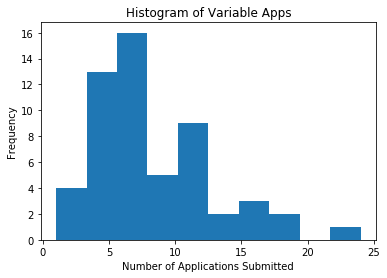

In [34]:
# Create a histogram for the numeric variable 'Apps'
medschool['Apps'].plot(kind = "hist")
plt.xlabel('Number of Applications Submitted')
plt.title('Histogram of Variable Apps')

Pictured above is a histogram for the variable 'Apps'. This variable represents the number of medical school applications submitted by each student in the dataset. The distribution for the variable 'Apps' does not appear to be normal, and appears to skew to the right. 

Text(0.5,1,'Scatterplot of GPA vs # of Applications Submitted ')

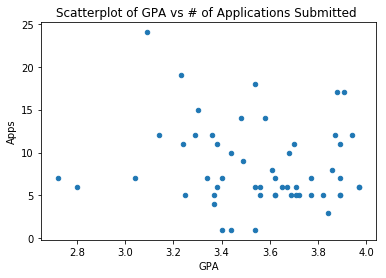

In [36]:
# Create a scatterplot to compare the number of applications submitted by students to their overall GPA
medschool.plot.scatter(x = 'GPA', y = 'Apps')
plt.title('Scatterplot of GPA vs # of Applications Submitted ')

Pictured above is a scatterplot comparing the overall GPA of medical school applicants with the number of applications each student submitted. There does not appear to be a strong correlation between an applicant's overall GPA and the number of medical school applications they submit.

In [25]:
# Now lets take a look at a statistic for a categorical variable
# Lets examine the counts for the categorical variable 'Accept'
medschool['Accept'].value_counts()

A    30
D    25
Name: Accept, dtype: int64

Above are the value counts for the categorical variable 'Accept', which represents whether or not an applicant was accepted into medical school. According to the counts, out of a total of 55 applicants, 30 applicants were accepted to medical school, and 25 applicants were denied acceptance to medical school.

Text(0.5,0,'Accepted or denied')

Text(0,0.5,'Number of Applicants')

Text(0.5,1,'Number of Applicants Accepted and Denied Admission to Medical School')

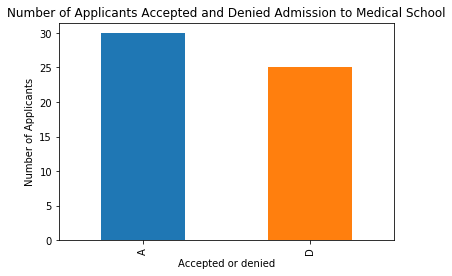

In [33]:
# Create a barplot displaying the counts for the variable 'Accept'
medschool['Accept'].value_counts().plot(kind = "bar")
plt.xlabel('Accepted or denied')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants Accepted and Denied Admission to Medical School')

The above barplot displays the number of applicants accepted and denied admittence into medical school. The blue bar represents the number of applicants accepted into medical school, which was 30 applicants. The orange bar represents the number of applicants that were denied admittance into medical school, which was 25 applicants. Therefore, it appears that more applicants were accepted into medical school than were denied admittance.

(-1.1107324058910208,
 1.1005111141255794,
 -1.1257612214975077,
 1.111934791893022)

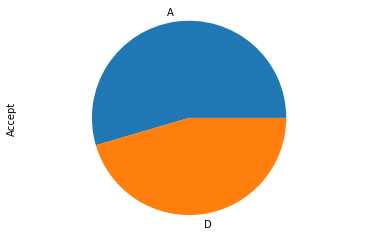

In [39]:
# Create a pie chart to display the proportions of those accepted and denied admittance to medical school
medschool['Accept'].value_counts() \
.plot(kind = "pie") \
.axis('equal')

It appears that a larger proportion of applicants were accepted into medical school than were denied. 